#  Projeto - Will it rain tomorrow?

A pergunta a se fazer: qual o custo do erro na previsão?

In [29]:
# Importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline

from sklearn.impute import SimpleImputer

from sklearn.model_selection import learning_curve, cross_val_score, KFold
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, plot_roc_curve

## Extraindo dados

###  Dados de chuva

In [2]:
rain = pd.read_csv('data_rain/rain_data_aus.csv')

In [33]:
rain.head()

,date,location,mintemp,maxtemp,rainfall,evaporation,sunshine,humidity9am,humidity3pm,pressure9am,...,cloud3pm,temp9am,temp3pm,raintoday,amountOfRain,raintomorrow,temp,humidity,precipitation3pm,precipitation9am
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,71.0,22.0,1007.7,...,NaN,16.9,21.8,No,0.0,No,29.48,28.400000,12,5.115360
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,44.0,25.0,1010.6,...,NaN,17.2,24.3,No,0.0,No,32.12,2.208569,10,21.497100
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,38.0,30.0,1007.6,...,2.0,21.0,23.2,No,0.0,No,32.84,38.000000,17,20.782859
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,45.0,16.0,1017.6,...,NaN,18.1,26.5,No,1.0,No,35.60,21.200000,8,12.028646
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,82.0,33.0,1010.8,...,8.0,17.8,29.7,No,0.2,No,40.76,41.600000,9,11.883546


In [34]:
rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 22 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   date              142193 non-null  object 
 1   location          142193 non-null  object 
 2   mintemp           141556 non-null  float64
 3   maxtemp           141871 non-null  float64
 4   rainfall          140787 non-null  float64
 5   evaporation       81350 non-null   float64
 6   sunshine          74377 non-null   float64
 7   humidity9am       140419 non-null  float64
 8   humidity3pm       138583 non-null  float64
 9   pressure9am       128179 non-null  float64
 10  pressure3pm       128212 non-null  float64
 11  cloud9am          88536 non-null   float64
 12  cloud3pm          85099 non-null   float64
 13  temp9am           141289 non-null  float64
 14  temp3pm           139467 non-null  float64
 15  raintoday         140787 non-null  object 
 16  amountOfRain      14

In [35]:
print(rain['date'].min())
print(rain['date'].max())

2007-11-01
2017-06-25


###  Dados de vento

In [3]:
wind = pd.read_csv('data_rain/wind_table_01.csv')
wind.head()

,date,location,wind_gustdir,wind_gustspeed,wind_dir9am,wind_dir3pm,wind_speed9am,wind_speed3pm
0,2007-11-01,Canberra,NW,30.0,SW,NW,6.0,20.0
1,2007-11-02,Canberra,ENE,39.0,E,W,4.0,17.0
2,2007-11-03,Canberra,NW,85.0,N,NNE,6.0,6.0
3,2007-11-04,Canberra,NW,54.0,WNW,W,30.0,24.0
4,2007-11-05,Canberra,SSE,50.0,SSE,ESE,20.0,28.0


In [4]:
for i in range(2,9):
    wind = pd.concat([wind, pd.read_csv(f'data_rain/wind_table_0{i}.csv')], ignore_index=True)
    
wind.head()

,date,location,wind_gustdir,wind_gustspeed,wind_dir9am,wind_dir3pm,wind_speed9am,wind_speed3pm,windgustdir,windgustspeed,winddir9am,winddir3pm,windspeed9am,windspeed3pm
0,2007-11-01,Canberra,NW,30.0,SW,NW,6.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2007-11-02,Canberra,ENE,39.0,E,W,4.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2007-11-03,Canberra,NW,85.0,N,NNE,6.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2007-11-04,Canberra,NW,54.0,WNW,W,30.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2007-11-05,Canberra,SSE,50.0,SSE,ESE,20.0,28.0,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
wind.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164386 entries, 0 to 164385
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   date            164386 non-null  object 
 1   location        164386 non-null  object 
 2   wind_gustdir    36419 non-null   object 
 3   wind_gustspeed  36426 non-null   float64
 4   wind_dir9am     36932 non-null   object 
 5   wind_dir3pm     38990 non-null   object 
 6   wind_speed9am   39300 non-null   float64
 7   wind_speed3pm   39328 non-null   float64
 8   windgustdir     117389 non-null  object 
 9   windgustspeed   117442 non-null  float64
 10  winddir9am      116026 non-null  object 
 11  winddir3pm      120561 non-null  object 
 12  windspeed9am    123633 non-null  float64
 13  windspeed3pm    121475 non-null  float64
dtypes: float64(6), object(8)
memory usage: 17.6+ MB


In [5]:
cont = 2
for col in wind.columns[8:14]:
    wind.loc[~wind[col].isnull(), wind.columns[cont]] = wind.loc[~wind[col].isnull(), col]
    cont +=1
    
wind = wind.drop(['windgustdir', 'windgustspeed', 'winddir9am', 'winddir3pm', 'windspeed9am', 'windspeed3pm'], axis=1)

In [40]:
wind.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164386 entries, 0 to 164385
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   date            164386 non-null  object 
 1   location        164386 non-null  object 
 2   wind_gustdir    153808 non-null  object 
 3   wind_gustspeed  153868 non-null  float64
 4   wind_dir9am     152958 non-null  object 
 5   wind_dir3pm     159551 non-null  object 
 6   wind_speed9am   162933 non-null  float64
 7   wind_speed3pm   160803 non-null  float64
dtypes: float64(3), object(5)
memory usage: 10.0+ MB


In [41]:
print(wind['date'].min())
print(wind['date'].max())

2007-11-01
2017-06-25


###  Agregando duas tabelas

In [6]:
df = pd.merge(left=rain, right=wind, how='left', on=['date', 'location'])

In [43]:
df.shape

(164386, 28)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164386 entries, 0 to 164385
Data columns (total 28 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   date              164386 non-null  object 
 1   location          164386 non-null  object 
 2   mintemp           163614 non-null  float64
 3   maxtemp           163989 non-null  float64
 4   rainfall          162767 non-null  float64
 5   evaporation       90128 non-null   float64
 6   sunshine          80607 non-null   float64
 7   humidity9am       162352 non-null  float64
 8   humidity3pm       159262 non-null  float64
 9   pressure9am       148085 non-null  float64
 10  pressure3pm       148113 non-null  float64
 11  cloud9am          100879 non-null  float64
 12  cloud3pm          95716 non-null   float64
 13  temp9am           163410 non-null  float64
 14  temp3pm           160309 non-null  float64
 15  raintoday         162767 non-null  object 
 16  amountOfRain      16

##  Tratamento dos dados

In [7]:
# Atenção: aqui, os dados nulos foram preenchidos com 0 (Negação)
df['raintoday'] = df['raintoday'].apply(lambda x: 1 if x == 'Yes' else 0)

In [8]:
df['raintomorrow'] = df['raintomorrow'].apply(lambda x: 1 if x == 'Yes' else 0)

In [9]:
df['date'] = pd.to_datetime(df['date'])

In [59]:
num_columns = list(df.select_dtypes(exclude='object').columns)

remove_col = ['date', 'raintomorrow', 'amountOfRain', 'modelo_vigente', 'temp', 'temp9am', 'temp3pm', 'humidity']

num_columns = [col for col in num_columns if col not in remove_col]
num_columns

['mintemp',
 'maxtemp',
 'rainfall',
 'evaporation',
 'sunshine',
 'humidity9am',
 'humidity3pm',
 'pressure9am',
 'pressure3pm',
 'cloud9am',
 'cloud3pm',
 'raintoday',
 'precipitation3pm',
 'precipitation9am',
 'wind_gustspeed',
 'wind_speed9am',
 'wind_speed3pm']

In [16]:
cat_columns = list(df.select_dtypes('object').columns)
cat_columns.remove('location')
cat_columns

['wind_gustdir', 'wind_dir9am', 'wind_dir3pm']

In [49]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

ordinalencoder = OrdinalEncoder()
onehotencoder = OneHotEncoder(drop='first',  handle_unknown='error')
cat_imputer = SimpleImputer(strategy='most_frequent')

#labelencoder = LabelEncoder()
#encoder.fit(df['wind_gustdir'])

#df['wind_gustdir'] = encoder.transform(df['wind_gustdir'])
#df['wind_dir9am'] = encoder.transform(df['wind_dir9am'])
#df['wind_dir3pm'] = encoder.transform(df['wind_dir3pm'])

In [55]:
categorical_pipeline = Pipeline(steps=[('missing', cat_imputer),
                                       ('encode', ordinalencoder)])

In [23]:
from sklearn.preprocessing import StandardScaler

numerical_imputer = SimpleImputer(strategy='median')
scaler = StandardScaler()

In [24]:
numerical_pipeline = Pipeline(steps=[('missing', numerical_imputer),
                                     ('standardize', scaler)])

In [66]:
from sklearn.compose import ColumnTransformer

dataprep = ColumnTransformer(transformers=[('numerical_transform', numerical_pipeline, num_columns),
                                           ('categ_transform', categorical_pipeline, cat_columns)])

##  Análise de correlação de colunas

In [52]:
# Analisando as colunas de temperatura, não há necessidade de se utilizar todas as colunas, pois, por exemplo,
# observa-se uma grande correlação entre 'mintemp' e 'temp9am' e entre 'maxtemp' e 'temp3pm'. Logo, pode-se utilizar
# apenas uma de cada. No caso de 'temp', os valore da coluna estão fora do intervalo entre 'mintemp' e 'maxtemp'.
# Por isso, essa coluna não será utilizada.

df[['mintemp', 'maxtemp', 'temp', 'temp9am', 'temp3pm']]

,mintemp,maxtemp,temp,temp9am,temp3pm
0,13.4,22.9,29.48,16.9,21.8
1,7.4,25.1,32.12,17.2,24.3
2,12.9,25.7,32.84,21.0,23.2
3,9.2,28.0,35.60,18.1,26.5
4,17.5,32.3,40.76,17.8,29.7
...,...,...,...,...,...
164381,3.6,25.3,32.36,10.9,24.5
164382,5.4,26.9,34.28,12.5,26.1
164383,5.4,26.9,34.28,12.5,26.1
164384,7.8,27.0,34.40,15.1,26.0


In [53]:
df[['mintemp', 'maxtemp', 'temp', 'temp9am', 'temp3pm', 'raintomorrow']].corr()

,mintemp,maxtemp,temp,temp9am,temp3pm,raintomorrow
mintemp,1.000000,0.736835,0.585375,0.902404,0.708974,0.082160
maxtemp,0.736835,1.000000,0.795143,0.887397,0.984536,-0.159619
temp,0.585375,0.795143,1.000000,0.704422,0.782308,-0.125842
temp9am,0.902404,0.887397,0.704422,1.000000,0.860599,-0.026293
temp3pm,0.708974,0.984536,0.782308,0.860599,1.000000,-0.193129
raintomorrow,0.082160,-0.159619,-0.125842,-0.026293,-0.193129,1.000000


In [54]:
# Analogamente à análise de temperatura, observa-se que as colunas de 'humidity' e 'humidity3pm' têm alta
# correlação. Portanto, apenas uma delas será utilizada.

df[['humidity9am', 'humidity3pm', 'humidity']].corr()

,humidity9am,humidity3pm,humidity
humidity9am,1.000000,0.666595,0.605826
humidity3pm,0.666595,1.000000,0.908273
humidity,0.605826,0.908273,1.000000


C:\Users\issao\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\issao\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\issao\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level functio

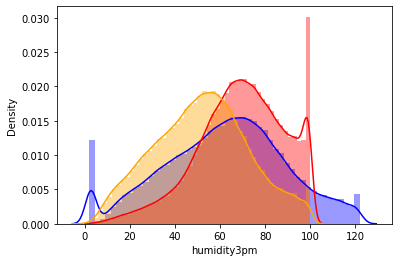

In [55]:
sns.distplot(df['humidity'], color='blue')
sns.distplot(df['humidity9am'], color='red')
sns.distplot(df['humidity3pm'], color='orange');

##  Outras análises

In [57]:
df[['amountOfRain', 'raintomorrow']].groupby('raintomorrow').agg(['min', 'max'])

amountOfRain       
                      min    max
raintomorrow                    
0                     0.0    1.0
1                     1.1  371.0

In [58]:
df[['amountOfRain', 'raintoday']].groupby('raintoday').agg(['min', 'max'])

amountOfRain       
                   min    max
raintoday                    
0                  0.0  240.0
1                  0.0  371.0

In [59]:
df[['rainfall', 'raintoday']].groupby('raintoday').agg(['min', 'max'])

rainfall       
               min    max
raintoday                
0              0.0    1.0
1              1.1  371.0

<AxesSubplot:xlabel='raintomorrow', ylabel='humidity3pm'>

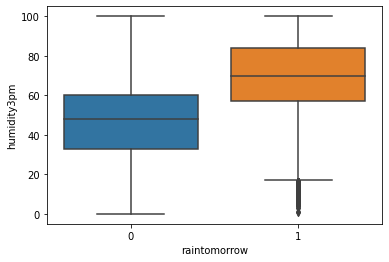

In [60]:
sns.boxplot(x=df['raintomorrow'], y=df['humidity3pm'])

C:\Users\issao\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\issao\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\issao\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level functio

<AxesSubplot:xlabel='wind_speed3pm', ylabel='Density'>

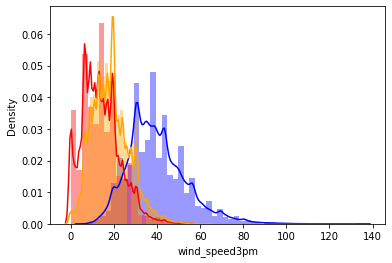

In [61]:
sns.distplot(df['wind_gustspeed'], color='blue')
sns.distplot(df['wind_speed9am'], color='red')
sns.distplot(df['wind_speed3pm'], color='orange')

##  Separando treino e teste

In [38]:
X = df.drop('raintomorrow', axis=1)
y = df['raintomorrow']

In [33]:
X = df[['mintemp', 'maxtemp', 'rainfall', 'evaporation', 'sunshine', 'humidity9am', 'humidity3pm', 'pressure9am',
       'pressure3pm', 'cloud9am', 'cloud3pm', 'raintoday', 'precipitation3pm', 'precipitation9am',
       'wind_gustdir', 'wind_gustspeed', 'wind_dir9am', 'wind_dir3pm', 'wind_speed9am', 'wind_speed3pm']]
y = df['raintomorrow']

In [63]:
X2 = df[['mintemp', 'maxtemp', 'rainfall', 'humidity9am', 'humidity3pm', 'pressure9am',
       'pressure3pm', 'precipitation3pm', 'wind_gustspeed', 'wind_speed9am', 'wind_speed3pm']]

In [64]:
df_drop = df[['mintemp', 'maxtemp', 'rainfall', 'humidity9am', 'humidity3pm', 'pressure9am',
       'pressure3pm', 'precipitation3pm', 'wind_gustspeed', 'wind_speed9am', 'wind_speed3pm']].dropna(thresh=8)

df_drop.shape

(161529, 11)

In [65]:
df_drop.isnull().sum()

mintemp               184
maxtemp                96
rainfall             1303
humidity9am          1245
humidity3pm          3223
pressure9am         13675
pressure3pm         13693
precipitation3pm        0
wind_gustspeed       8129
wind_speed9am         366
wind_speed3pm        1381
dtype: int64

In [66]:
X.shape

(164386, 20)

In [67]:
X2.isnull().sum()

mintemp               772
maxtemp               397
rainfall             1619
humidity9am          2034
humidity3pm          5124
pressure9am         16301
pressure3pm         16273
precipitation3pm        0
wind_gustspeed      10518
wind_speed9am        1453
wind_speed3pm        3583
dtype: int64

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=35, stratify=y)

In [69]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.2, random_state=35, stratify=y)

##  Treinando modelo LGBM

In [70]:
from lightgbm import LGBMClassifier, plot_importance

lgbm = LGBMClassifier(max_depth=4, n_estimators=70, colsample_bytree=.7, n_jobs=-1)
lgbm.fit(X_train, y_train)

LGBMClassifier(colsample_bytree=0.7, max_depth=4, n_estimators=70)

In [71]:
print(precision_score(lgbm.predict(X_test), y_test))
print(recall_score(lgbm.predict(X_test), y_test))
print(f1_score(lgbm.predict(X_test), y_test))

0.4986166407989743
0.7392696348174087
0.5955508986862255


In [26]:
print(roc_auc_score(y_train, lgbm.predict_proba(X_train)[:,1]))
print(roc_auc_score(y_test, lgbm.predict_proba(X_test)[:,1]))

0.8817050395451486
0.8760692143498832


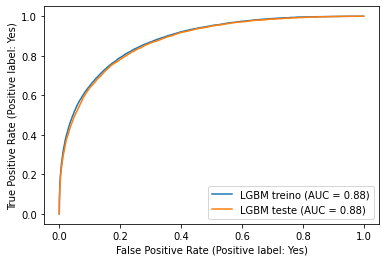

In [27]:
fig, ax = plt.subplots()

plot_roc_curve(lgbm, X_train, y_train, ax=ax, name='LGBM treino')
plot_roc_curve(lgbm, X_test, y_test, ax=ax, name='LGBM teste')

In [220]:
lgbm_std = LGBMClassifier(max_depth=4, n_estimators=70, colsample_bytree=.7, n_jobs=-1)
lgbm_std.fit(X_train_std, y_train)

LGBMClassifier(colsample_bytree=0.7, max_depth=4, n_estimators=70)

In [244]:
print(roc_auc_score(y_train, lgbm_std.predict_proba(X_train_std)[:,1]))
print(roc_auc_score(y_test, lgbm_std.predict_proba(X_test_std)[:,1]))

0.8805143303986291
0.8768863607412292


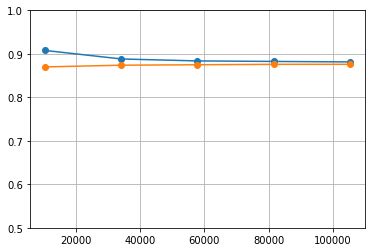

In [253]:
curves = learning_curve(lgbm, X_train, y_train, scoring='roc_auc')

train_sizes = curves[0]
train_scores = curves[1]
test_scores = curves[2]

plt.plot(train_sizes, train_scores.mean(axis=1),'-o')
plt.plot(train_sizes, test_scores.mean(axis=1),'-o');
plt.ylim([0.5, 1])
plt.grid();

In [275]:
lgbm2 = LGBMClassifier(max_depth=4, n_estimators=70, colsample_bytree=.7, n_jobs=-1)
lgbm2.fit(X2_train, y2_train)

LGBMClassifier(colsample_bytree=0.7, max_depth=4, n_estimators=70)

In [276]:
print(roc_auc_score(y2_train, lgbm2.predict_proba(X2_train)[:,1]))
print(roc_auc_score(y2_test, lgbm2.predict_proba(X2_test)[:,1]))

0.8684591661140797
0.8638037529883231


In [277]:
lgbm2.predict_proba(X2_test)[:,1]

array([0.13658   , 0.26824244, 0.07499037, ..., 0.06268261, 0.12332027,
       0.04834003])

In [278]:
print(precision_score(lgbm2.predict(X2_test), y2_test))
print(recall_score(lgbm2.predict(X2_test), y2_test))
print(f1_score(lgbm2.predict(X2_test), y2_test))

0.4747638326585695
0.7467628953513055
0.580480158402772


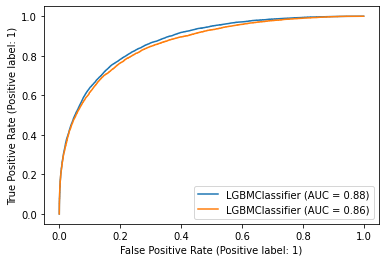

In [279]:
fig, ax = plt.subplots()

plot_roc_curve(lgbm, X_test, y_test, ax=ax)
plot_roc_curve(lgbm2, X2_test, y2_test, ax=ax)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

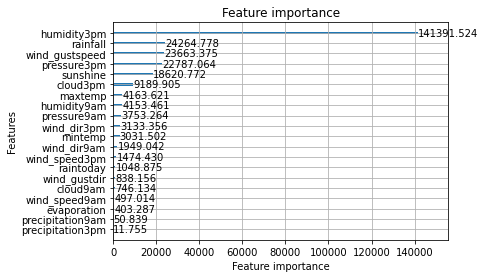

In [223]:
plot_importance(lgbm, importance_type='gain')

##  Escolha do modelo

In [30]:
from lightgbm import LGBMClassifier, plot_importance

model_lgbm = LGBMClassifier(max_depth=4, n_estimators=70, colsample_bytree=.7, n_jobs=-1)

In [75]:
from sklearn.linear_model import LogisticRegression

model_log = LogisticRegression()

In [88]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bagging = BaggingClassifier(
            base_estimator=DecisionTreeClassifier(max_depth=3), 
            n_estimators=100)

model_tree = DecisionTreeClassifier(max_depth=5)

In [103]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(max_depth=5, n_estimators=70, n_jobs=-1)

In [110]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=20)

In [113]:
from mlxtend.classifier import StackingClassifier

stacking = StackingClassifier(classifiers=[model_tree, forest, knn, bagging, model_log], 
                              meta_classifier=LogisticRegression(), 
                              use_probas=True, 
                              average_probas=True)

In [76]:
pipeline = Pipeline(steps=[('preprocessing', dataprep),
                           ('modelling', model_lgbm)
                          ])

pipeline.fit(X_train, y_train);

In [114]:
pipeline2 = Pipeline(steps=[('preprocessing', dataprep),
                           ('modelling', stacking)
                          ])

pipeline2.fit(X_train, y_train);

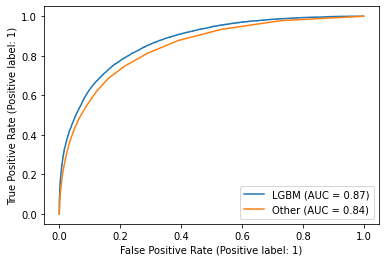

In [112]:
fig, ax = plt.subplots()

plot_roc_curve(pipeline, X_test, y_test, ax=ax, name='LGBM')
plot_roc_curve(pipeline2, X_test, y_test, ax=ax, name='Other')

In [ ]:
print(roc_auc_score(y_train, pipeline.predict_proba(X_train)[:,1]))
print(roc_auc_score(y_test, pipeline.predict_proba(X_test)[:,1]))

In [80]:
cross_val_score(pipeline, X_train, y_train, cv=KFold(n_splits=5), scoring='roc_auc')

array([0.8749917 , 0.87156933, 0.87068364, 0.8693791 , 0.87265199])

In [ ]:
pipeline.predict_proba(X_test)[:,1]

In [ ]:
print(precision_score(pipeline.predict(X_test), y_test))
print(recall_score(pipeline.predict(X_test), y_test))
print(f1_score(pipeline.predict(X_test), y_test))

##  Trabalhando com dados sazonais

Na Austrália:

Verão: Dezembro a Fevereiro

Outono: Março a Maio

Inverno: Junho a Agosto

Primavera: Setembro a Novembro

In [129]:
X_verao = df.loc[(df['date'].dt.month<=2) | (df['date'].dt.month==12), ['mintemp', 'maxtemp', 'rainfall', 'humidity9am',
                                                                        'humidity3pm', 'pressure9am', 'pressure3pm',
                                                                        'precipitation3pm', 'wind_gustspeed',
                                                                        'wind_speed9am', 'wind_speed3pm']]
X_verao = X_verao.reset_index()

y_verao = df.loc[(df['date'].dt.month<=2) | (df['date'].dt.month==12), 'raintomorrow']
y_verao = y_verao.reset_index()

In [132]:
X_verao = X_verao.drop('index', axis=1)
y_verao = y_verao.drop('index', axis=1)

In [161]:
X_v_train, X_v_test, y_v_train, y_v_test = train_test_split(X_verao, np.ravel(y_verao), test_size=0.2, random_state=35, stratify=y_verao)

In [97]:
X_outono = df.loc[(df['date'].dt.month<=5) & (df['date'].dt.month>=3), ['mintemp', 'maxtemp', 'rainfall', 'humidity9am',
                                                                        'humidity3pm', 'pressure9am', 'pressure3pm',
                                                                        'precipitation3pm', 'wind_gustspeed',
                                                                        'wind_speed9am', 'wind_speed3pm']]
X_outono = X_outono.reset_index()

y_outono = df.loc[(df['date'].dt.month<=5) & (df['date'].dt.month>=3), 'raintomorrow']
y_outono = y_outono.reset_index()

In [137]:
X_outono = X_outono.drop('index', axis=1)
y_outono = y_outono.drop('index', axis=1)

In [138]:
X_o_train, X_o_test, y_o_train, y_o_test = train_test_split(X_outono, y_outono, test_size=0.2, random_state=35, stratify=y_outono)

In [99]:
X_inverno = df.loc[(df['date'].dt.month<=8) & (df['date'].dt.month>=6), ['mintemp', 'maxtemp', 'rainfall', 'humidity9am',
                                                                        'humidity3pm', 'pressure9am', 'pressure3pm',
                                                                        'precipitation3pm', 'wind_gustspeed',
                                                                        'wind_speed9am', 'wind_speed3pm']]
X_inverno = X_inverno.reset_index()

y_inverno = df.loc[(df['date'].dt.month<=8) & (df['date'].dt.month>=6), 'raintomorrow']
y_inverno = y_inverno.reset_index()

In [139]:
X_inverno = X_inverno.drop('index', axis=1)
y_inverno = y_inverno.drop('index', axis=1)

In [140]:
X_i_train, X_i_test, y_i_train, y_i_test = train_test_split(X_inverno, y_inverno, test_size=0.2, random_state=35, stratify=y_inverno)

In [98]:
X_primavera = df.loc[(df['date'].dt.month<=11) & (df['date'].dt.month>=9), ['mintemp', 'maxtemp', 'rainfall', 'humidity9am',
                                                                        'humidity3pm', 'pressure9am', 'pressure3pm',
                                                                        'precipitation3pm', 'wind_gustspeed',
                                                                        'wind_speed9am', 'wind_speed3pm']]
X_primavera = X_primavera.reset_index()

y_primavera = df.loc[(df['date'].dt.month<=11) & (df['date'].dt.month>=9), 'raintomorrow']
y_primavera = y_primavera.reset_index()

In [141]:
X_primavera = X_primavera.drop('index', axis=1)
y_primavera = y_primavera.drop('index', axis=1)

In [142]:
X_p_train, X_p_test, y_p_train, y_p_test = train_test_split(X_primavera, y_primavera, test_size=0.2, random_state=35, stratify=y_primavera)

###  Treinando o modelo

In [100]:
modelo_lgbm = LGBMClassifier(max_depth=4, n_estimators=70, colsample_bytree=.7, n_jobs=-1)

In [103]:
pipeline = Pipeline(steps=[('modelling', modelo_lgbm)])

In [162]:
pipeline.fit(X_v_train, y_v_train)

Pipeline(steps=[('modelling',
                 LGBMClassifier(colsample_bytree=0.7, max_depth=4,
                                n_estimators=70))])

In [163]:
cross_val_score(pipeline, X_v_train, y_v_train, scoring='roc_auc', cv=KFold(n_splits=10, shuffle=True))

array([0.86854123, 0.86980143, 0.87333401, 0.87165049, 0.87916041,
       0.85892687, 0.85897944, 0.88322752, 0.86202687, 0.86678553])

In [149]:
lgbm_verao = LGBMClassifier(max_depth=4, n_estimators=70, colsample_bytree=.7, n_jobs=-1)

In [164]:
lgbm_verao.fit(X_v_train, y_v_train)

LGBMClassifier(colsample_bytree=0.7, max_depth=4, n_estimators=70)

In [165]:
print(roc_auc_score(y_v_train, lgbm_verao.predict_proba(X_v_train)[:,1]))
print(roc_auc_score(y_v_test, lgbm_verao.predict_proba(X_v_test)[:,1]))

0.8845877811877918
0.8723623099901593


In [166]:
print(precision_score(lgbm_verao.predict(X_v_test), y_v_test))
print(recall_score(lgbm_verao.predict(X_v_test), y_v_test))
print(f1_score(lgbm_verao.predict(X_v_test), y_v_test))

0.4623243933588761
0.7494824016563147
0.5718799368088469


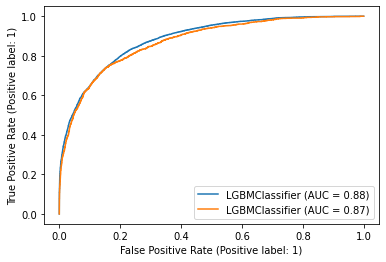

In [153]:
fig, ax = plt.subplots()

plot_roc_curve(lgbm_verao, X_v_train, y_v_train, ax=ax)
plot_roc_curve(lgbm_verao, X_v_test, y_v_test, ax=ax)